In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import numpy as np
from folium.plugins import MarkerCluster
from branca.colormap import LinearColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv('/Users/wegz/Downloads/Traffic_Crashes_Resulting_in_Injury_20240412.csv', low_memory=False)


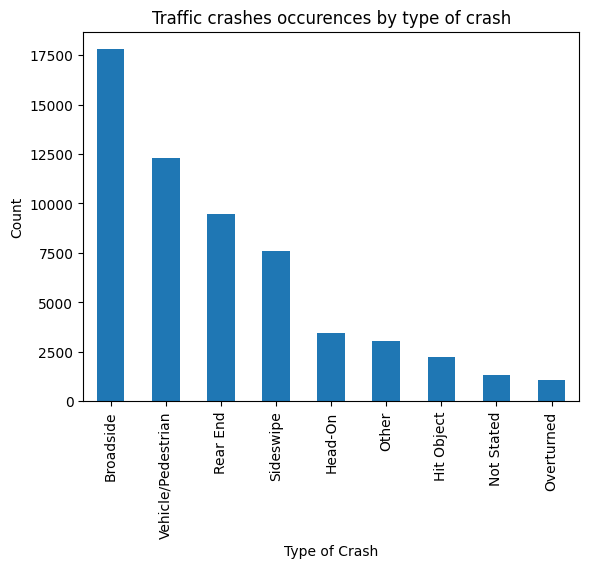

In [7]:
# Group by 'type_of_crash' and count the occurrences
type_counts = df['type_of_collision'].value_counts()

# Plotting the bar chart
type_counts.plot(kind='bar')

# Adding titles and labels
plt.title('Traffic crashes occurences by type of crash')
plt.xlabel('Type of Crash')
plt.ylabel('Count')

# Display the plot
plt.show()


To mitigate the risks associated with broadside collisions, many modern vehicles are equipped with safety features such as side-impact airbags, reinforced side structures, and side-curtain airbags. Additionally, advancements in traffic management and the implementation of roundabouts and other intersection designs aim to reduce the likelihood of these types of crashes.

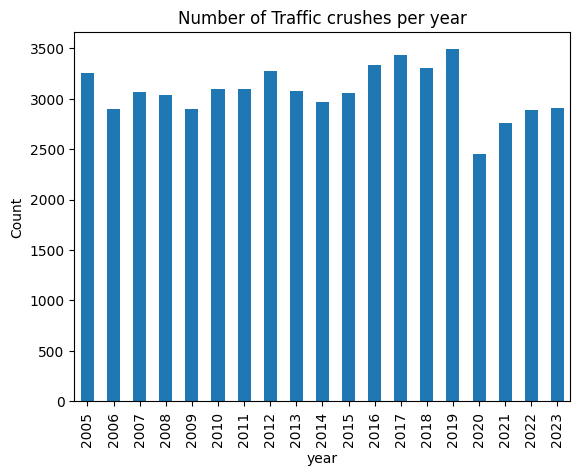

In [12]:
# Group by 'accident_year' and count the occurrences
type_counts = df['accident_year'].value_counts()
type_counts_sorted = type_counts.sort_index()
# Plotting the bar chart
type_counts_sorted.plot(kind='bar')

# Adding titles and labels
plt.title('Number of Traffic crashes per year')
plt.xlabel('year')
plt.ylabel('Count')

# Display the plot
plt.show()


2020-2022 could be related to corona

In [90]:

df = df.dropna(subset=['tb_latitude', 'tb_longitude'])
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.tb_latitude, df.tb_longitude))

# Create a base map
map = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(map)

# Add points to the marker cluster
for idx, row in gdf.iterrows():
    folium.Marker(location=[row['tb_latitude'], row['tb_longitude']]).add_to(marker_cluster)

# Display the map
map.save('detailed_map_traffic_crash.html')


In [ ]:
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import branca

# Assuming 'df' is your DataFrame

# Drop rows with missing latitude or longitude
df = df.dropna(subset=['tb_latitude', 'tb_longitude'])

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.tb_latitude, df.tb_longitude))

# Create a base map
map = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(map)

# Define a simple function to assign colors based on count
def get_color(count):
    if count > 5000:
        return 'darkred'
    elif count > 2000:
        return 'red'
    elif count > 1000:
        return 'orange'
    elif count > 500:
        return 'yellow'
    else:
        return 'green'


# Add points to the marker cluster with color based on count
for idx, row in gdf.iterrows():
    marker_color = get_color(row['crash_count'])  # Assuming 'crash_count' is a column in your DataFrame
    folium.Marker(
        location=[row['tb_latitude'], row['tb_longitude']],
        icon=folium.Icon(color=marker_color)
    ).add_to(marker_cluster)

# Create a legend
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 150px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Crash Count Legend <br>
     &nbsp; > 5000 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:darkred"></i><br>
     &nbsp; 2001-5000 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; 1001-2000 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i><br>
     &nbsp; 501-1000 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:yellow"></i><br>
     &nbsp; 1-500 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i>
</div>
'''

# Add the legend to the map
map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
map.save('detailed_map_traffic_crash.html')


In [14]:
loc_df = df.dropna(subset=['tb_latitude', 'tb_longitude'])


In [16]:
location_counts = df.groupby(['tb_latitude', 'tb_longitude']).size().reset_index(name='crash_count')


In [18]:
location_counts.head()


,tb_latitude,tb_longitude,crash_count
0,37.707459,-122.462900,1
1,37.708020,-122.412497,1
2,37.708086,-122.485724,4
3,37.708086,-122.485724,1
4,37.708086,-122.485724,19


In [41]:
# import folium
# from folium.plugins import MarkerCluster
# import geopandas as gpd
# from branca.colormap import linear

# # Assuming 'df' is your DataFrame and it contains 'tb_latitude', 'tb_longitude' columns
# # Drop rows with missing latitude or longitude
# df = df.dropna(subset=['tb_latitude', 'tb_longitude'])

# # Group by latitude and longitude to get the count of crashes at each location
# location_counts = df.groupby(['tb_latitude', 'tb_longitude']).size().reset_index(name='crash_count')

# # Merge the counts back into the original DataFrame
# df_merge = df.merge(location_counts, on=['tb_latitude', 'tb_longitude'])

# # Convert the DataFrame to a GeoDataFrame
# gdf = gpd.GeoDataFrame(df_merge, geometry=gpd.points_from_xy(df_merge.tb_latitude, df_merge.tb_longitude))

# # Create a base map centered on San Francisco
# map = folium.Map(location=[37.7749, -122.4194], zoom_start=13)

# # Define the color scale thresholds and corresponding colors
# threshold_scale = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
# colors = [
#     '#d73027', '#f46d43', '#fdae61', '#fee08b',
#     '#ffffbf', '#d9ef8b', '#a6d96a', '#66bd63',
#     '#1a9850', '#006837', '#004529'
# ]

# # Create a stepped color scale
# color_scale = LinearColormap(
#     colors,
#     index=threshold_scale,
#     vmin=min(threshold_scale),
#     vmax=max(threshold_scale),
#     caption='Crash Count'  # This is the caption for the legend
# )

# # Add a marker cluster to the map
# marker_cluster = MarkerCluster().add_to(map)

# # Add points to the marker cluster with colors based on the number of crashes
# for idx, row in gdf.iterrows():
#     color = color_scale(row['crash_count'])
#     folium.CircleMarker(
#         location=[row['tb_latitude'], row['tb_longitude']],
#         radius=5,
#         color=color,
#         fill=True,
#         fill_color=color
#     ).add_to(marker_cluster)

# # Add the color scale to the map
# color_scale.add_to(map)

# # Display the map
# map.save('map_traffic_crash_1.html')


### plotly

In [45]:
import json
import plotly.express as px
import plotly.io as pio
from urllib.request import urlopen


In [47]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.tb_longitude, df.tb_latitude))


In [50]:
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    district_data = json.load(response)


In [52]:
districts_gdf = gpd.GeoDataFrame.from_features(district_data)


In [53]:
# Perform the spatial join
gdf_with_districts = gpd.sjoin(gdf, districts_gdf, how='left', op='within')


/Users/wegz/.pyenv/versions/3.10.7/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [58]:
gdf_with_districts = gdf_with_districts.groupby(['DISTRICT']).size().reset_index(name='crash_count')


In [56]:
gdf_with_districts.head()


,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,geometry,index_right,OBJECTID,DISTRICT,COMPANY
0,73551,22882000.0,4060000.0,230884432,37.743586,-122.463710,SFPD-INTERIM DB,CITY STREET,12/18/2023 02:15:00 PM,2023 December 18,...,49.0,49.0,10.0,8.0,41.0,POINT (-122.46371 37.74359),7.0,8.0,TARAVAL,I
1,23055,23838000.0,NaN,150060071,37.781750,-122.396380,SFPD-CROSSROADS,CITY STREET,01/20/2015 10:07:00 AM,2015 January 20,...,32.0,32.0,1.0,10.0,8.0,POINT (-122.39638 37.78175),1.0,2.0,SOUTHERN,B
2,41755,27803000.0,1977000.0,130332135,37.761830,-122.503878,SFPD-CROSSROADS,CITY STREET,04/23/2013 11:26:00 AM,2013 April 23,...,39.0,39.0,10.0,7.0,35.0,POINT (-122.50388 37.76183),7.0,8.0,TARAVAL,I
3,24743,30739000.0,8747203.0,3348111,37.783992,-122.408066,SFPD-CROSSROADS,CITY STREET,08/22/2007 10:30:00 PM,2007 August 22,...,19.0,19.0,5.0,10.0,34.0,POINT (-122.40807 37.78399),1.0,2.0,SOUTHERN,B
4,30142,26494000.0,6039101.0,4395868,37.785291,-122.424770,SFPD-CROSSROADS,CITY STREET,09/03/2009 01:35:00 PM,2009 September 03,...,100.0,100.0,4.0,11.0,39.0,POINT (-122.42477 37.78529),8.0,9.0,NORTHERN,E


In [91]:
# Plotting with Plotly
fig = px.choropleth_mapbox(
    gdf_with_districts, geojson=district_data,
    locations='DISTRICT',
    color='crash_count',  # Color points by crash count
    color_continuous_scale="RdBu",
    range_color=(0, gdf_with_districts['crash_count'].max()),
    hover_name='DISTRICT',  # Show district name on hover
    mapbox_style='carto-positron',  # open-street-map
    zoom=12,  # Set the initial zoom level
    center={'lat': 37.7749, 'lon': -122.4194}  # Center the map on San Francisco
)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},
                  title_text="Number of traffic crashes by District in San Francisco",
                  title_font_size=26,
                  height=1100,
                  width=1600,
                 )

fig.write_html("district_map_traffic_crash.html")
# Your Plotly code here
fig.show()


### We can see that the Southern and Northern have very high numbers, and from google map view we can see there are much more major roads/highways (indicated by yellow color) in these areas, while in other areas they are more white (smaller local roads). Higher numbers of cars and higher speed.

A lot of cross roads accident if we zoom in the map, to consider to take some actions (ask gpt)

1. Filter out empty value from latitude, longitude, point, google map view
2. Check what we can do with google map view
3. Wider road or bigger road has more injuries? Missing speed factor
4. 

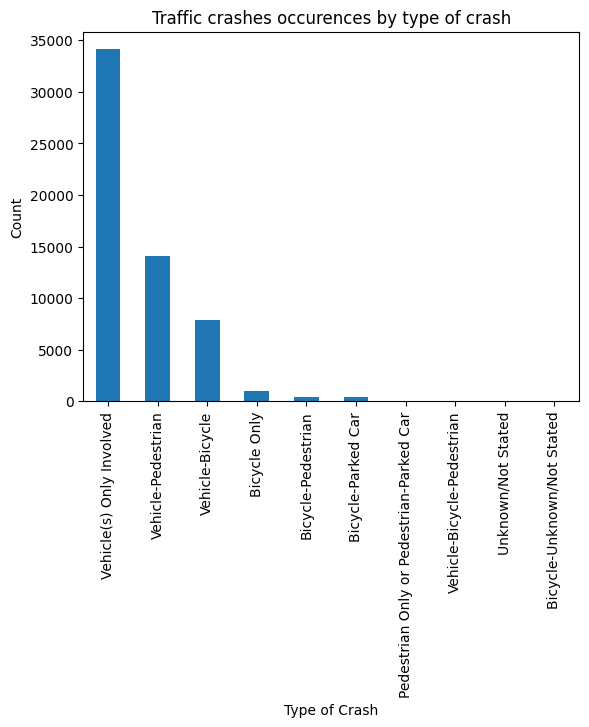

In [92]:
# Group by 'type_of_crash' and count the occurrences
type_counts = df['dph_col_grp_description'].value_counts()

# Plotting the bar chart
type_counts.plot(kind='bar')

# Adding titles and labels
plt.title('Traffic crashes occurences by type of crash')
plt.xlabel('Type of Crash')
plt.ylabel('Count')

# Display the plot
plt.show()


In [105]:
number_killed_df = df[df['number_killed']>0]


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns


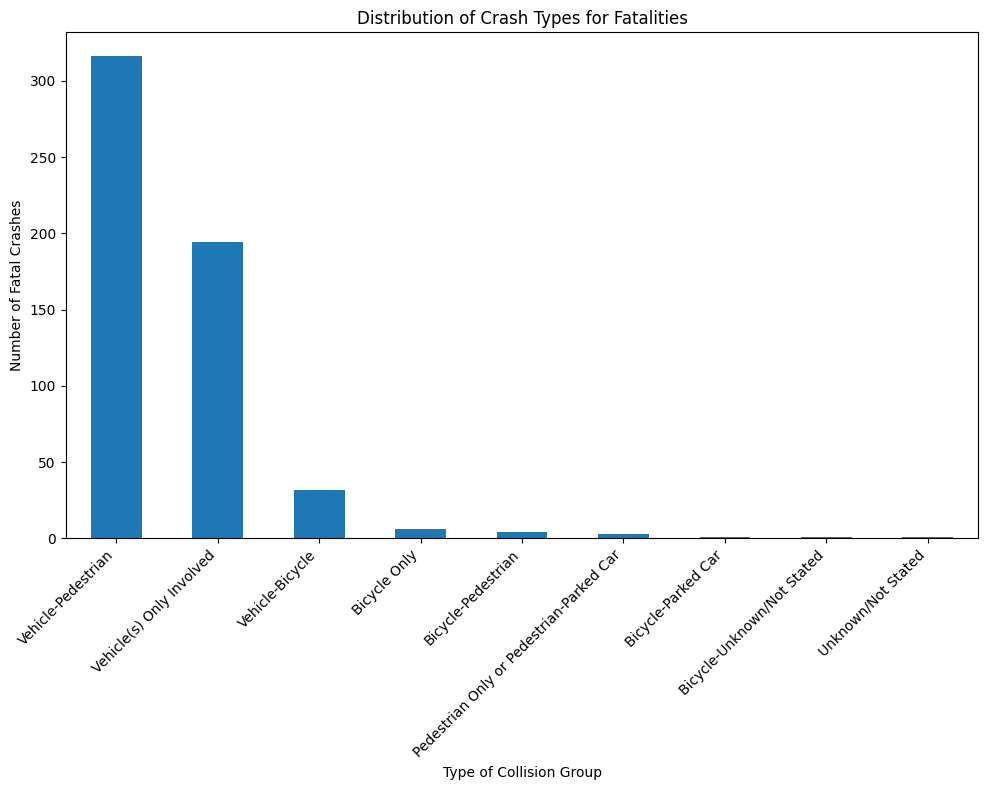

In [106]:
# Group the data by 'dph_col_grp_description' and sum the 'number_killed' for each group
crash_type_sums = number_killed_df.groupby('dph_col_grp_description')['number_killed'].sum()

# Sort the sums in descending order to have the most fatalities at the top
crash_type_sums = crash_type_sums.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
crash_type_sums.plot(kind='bar')
plt.title('Distribution of Crash Types for Fatalities')
plt.xlabel('Type of Collision Group')
plt.ylabel('Number of Fatal Crashes')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()


In [107]:
number_injured_df = df[df['number_injured']>0]


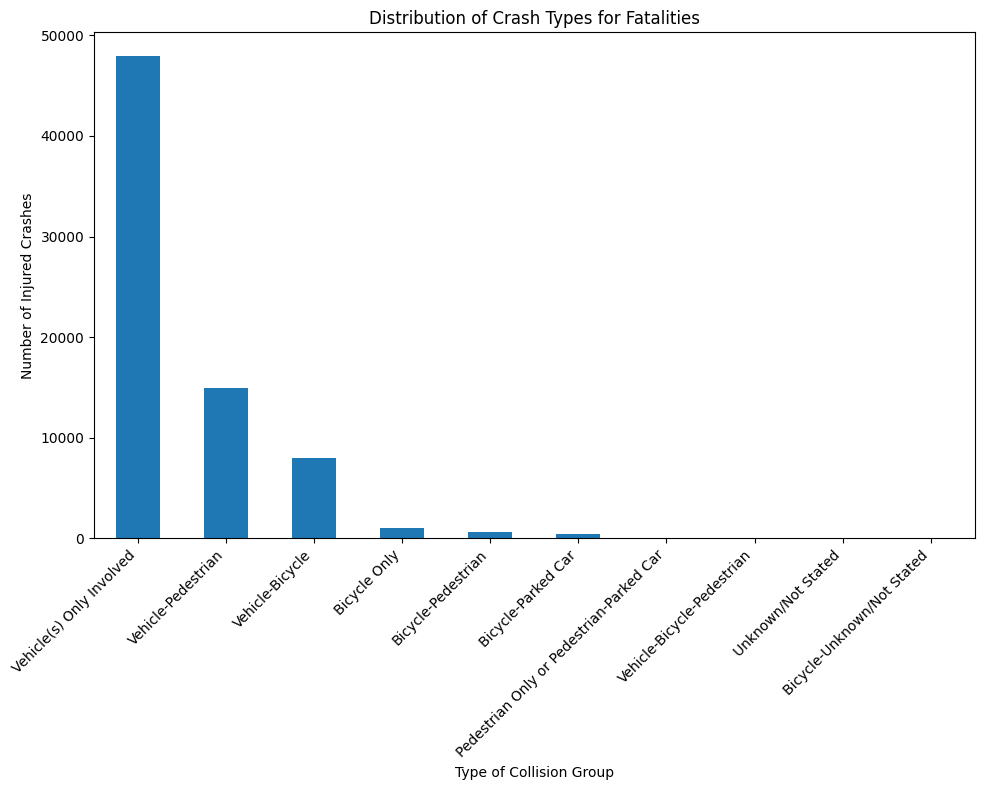

In [110]:
# Group the data by 'dph_col_grp_description' and sum the 'number_killed' for each group
crash_type_sums = number_injured_df.groupby('dph_col_grp_description')['number_injured'].sum()

# Sort the sums in descending order to have the most fatalities at the top
crash_type_sums = crash_type_sums.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
crash_type_sums.plot(kind='bar')
plt.title('Distribution of Crash Types for Fatalities')
plt.xlabel('Type of Collision Group')
plt.ylabel('Number of Injured Crashes')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()


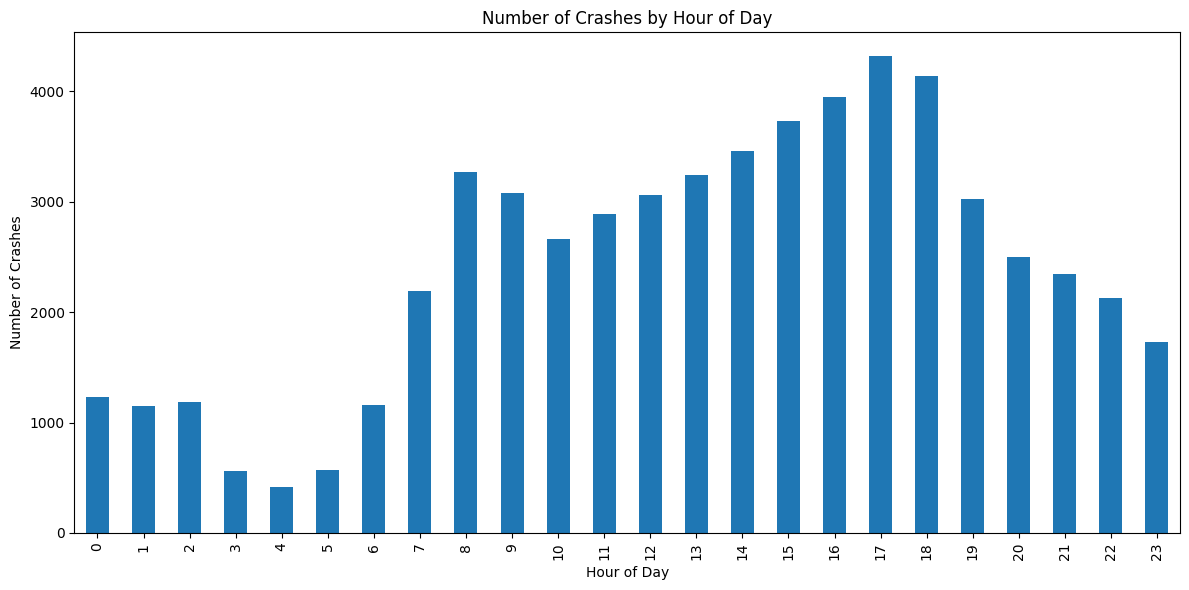

In [111]:
df['hour_of_day'] = pd.to_datetime(df['collision_time'], format='%H:%M:%S').dt.hour
# Count the number of crashes for each hour
hourly_crash_counts = df['hour_of_day'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
hourly_crash_counts.plot(kind='bar')
plt.title('Number of Crashes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 24), range(0, 24))  # Ensure all hours are displayed on the x-axis
plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()


## It is more often in the evening as people tend to be more impatient, so even though 7-9 and 15-18 both are high traffic time, we can see higher amount in the evening rush hours, and we didn't see a significant difference among the weekdays except Weekends.

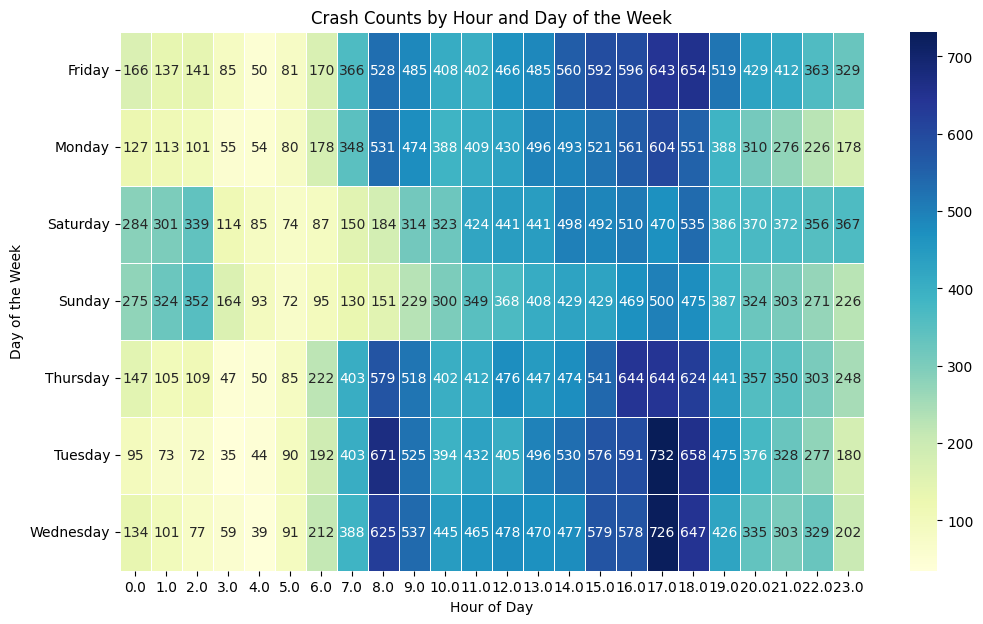

In [112]:
# Create a pivot table with hours as columns, days of the week as rows, and counts as values
heatmap_data = df.pivot_table(index='day_of_week', columns='hour_of_day', values='unique_id', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=.5, annot=True, fmt='d')
plt.title('Crash Counts by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.yticks(rotation=0)  # Keep the y-axis labels horizontal for better readability
plt.show()


In [17]:

# Convert the 'datetime' column to datetime objects
df['collision_datetime'] = pd.to_datetime(df['collision_datetime'])

# Extract features from the datetime column
df['hour'] = df['collision_datetime'].dt.hour
df['day_of_week'] = df['collision_datetime'].dt.dayofweek

# For this example, we'll just count the number of crashes per hour and day of the week
# You might want to include more features relevant to your problem
df['crash_count'] = 1
df_features = df.groupby(['hour', 'day_of_week']).count()['crash_count'].reset_index()

# Prepare the data for training
X = df_features[['hour', 'day_of_week']]
y = df_features['crash_count']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE) for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error for Linear Regression: {mse_linear}')


Mean Squared Error for Linear Regression: 24324.057062397624


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming df is your existing DataFrame with traffic crash data
# Add a crash_count column with a constant value of 1
df['crash_count'] = 1

# One-hot encode the categorical weather and lighting conditions
df_encoded = pd.get_dummies(df, columns=['weather_1', 'lighting'])

# Define features for clustering
features_for_clustering = [col for col in df_encoded.columns if 'weather_1' in col or 'lighting' in col]

# Create a K-Means clustering pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=5, random_state=42))  # Choose an appropriate number of clusters
])

# Fit the pipeline to the data
pipeline.fit(df_encoded[features_for_clustering])

# Predict the clusters
df['cluster'] = pipeline.predict(df_encoded[features_for_clustering])

# Analyze the clusters
for cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    crash_likelihood = cluster_data['crash_count'].mean()
    # Get the most common weather and lighting conditions for the cluster
    # Note: mode() can return multiple values, so we take the first one with [0]
    most_common_weather = cluster_data['weather_1'].mode()[0] if not cluster_data['weather_1'].mode().empty else 'N/A'
    most_common_lighting = cluster_data['lighting'].mode()[0] if not cluster_data['lighting'].mode().empty else 'N/A'

    print(f"Cluster {cluster}: Average crashes = {crash_likelihood:.2f}")
    print(f"Most common weather condition: {most_common_weather}")
    print(f"Most common lighting condition: {most_common_lighting}\n")


Cluster 0: Average crashes = 1.00
Most common weather condition: Cloudy
Most common lighting condition: Daylight

Cluster 1: Average crashes = 1.00
Most common weather condition: Raining
Most common lighting condition: Dark - Street Lights

Cluster 2: Average crashes = 1.00
Most common weather condition: Wind
Most common lighting condition: Daylight

Cluster 3: Average crashes = 1.00
Most common weather condition: Clear
Most common lighting condition: Dusk - Dawn

Cluster 4: Average crashes = 1.00
Most common weather condition: Clear
Most common lighting condition: Daylight
